# Қайталанатын нейрондық желілер (RNN). Week 16
Тізбектермен жұмыс, LSTM және GRU архитектуралары, екі бағытты RNN, градиенттің жоғалуы мәселесі

## 1️⃣ Теориялық тапсырмалар

1.1. RNN дегеніміз не? Оны кәдімгі feedforward нейрондық желілерден айырмашылығы неде?

1.2. RNN қандай есептерде тиімді қолданылады? Кемінде 4 мысал келтір (мысалы: мәтін, уақыттық қатарлар).

 1.3. Hidden state ұғымын түсіндір. Ол не үшін қажет?

 1.4. Vanishing gradient және exploding gradient мәселелері деген не?

 1.5. LSTM және GRU не үшін ұсынылды? Олардың RNN-нен негізгі айырмашылығы қандай?

 1.6. RNN-ді қай кезде қолдану тиімсіз болады?


### 1.1. RNN дегеніміз не? Оны кәдімгі feedforward нейрондық желілерден айырмашылығы неде?
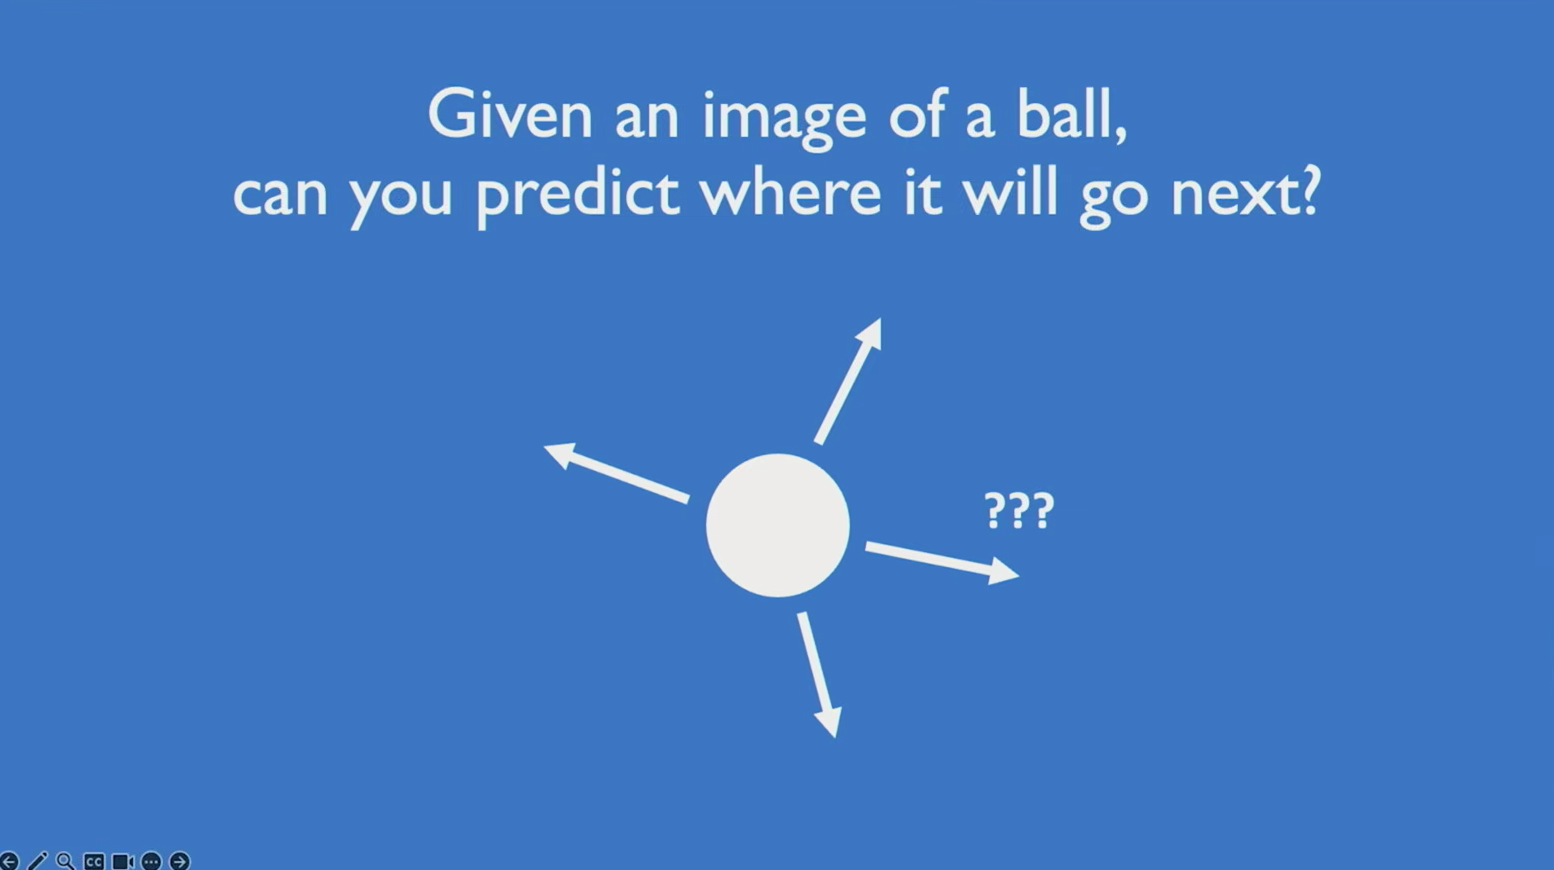

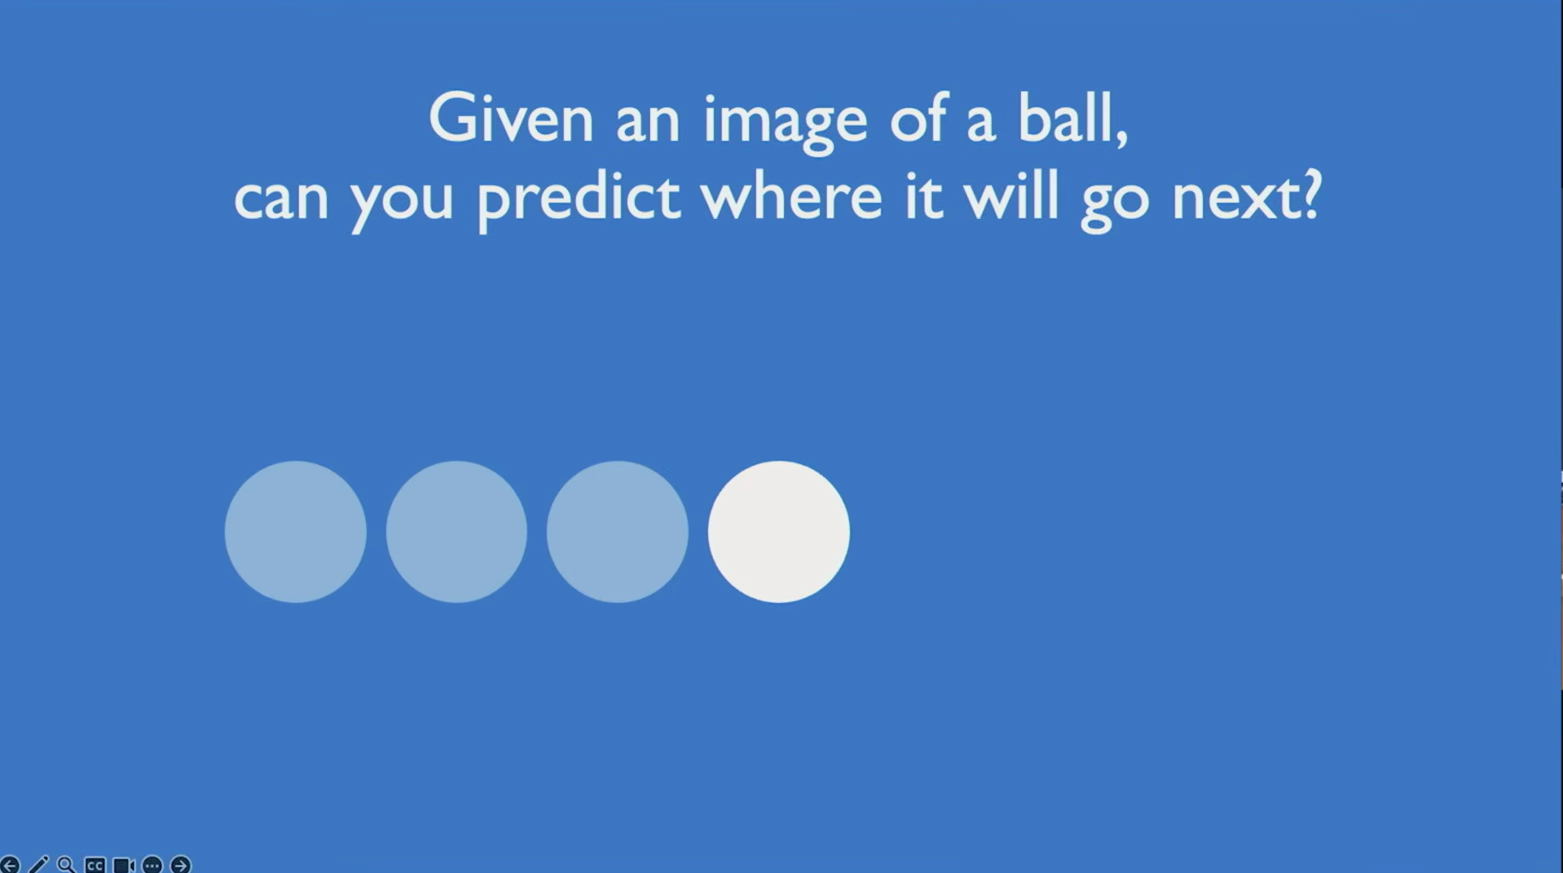

### 1.2. RNN қандай есептерде тиімді қолданылады? Кемінде 4 мысал келтір (мысалы: мәтін, уақыттық қатарлар)
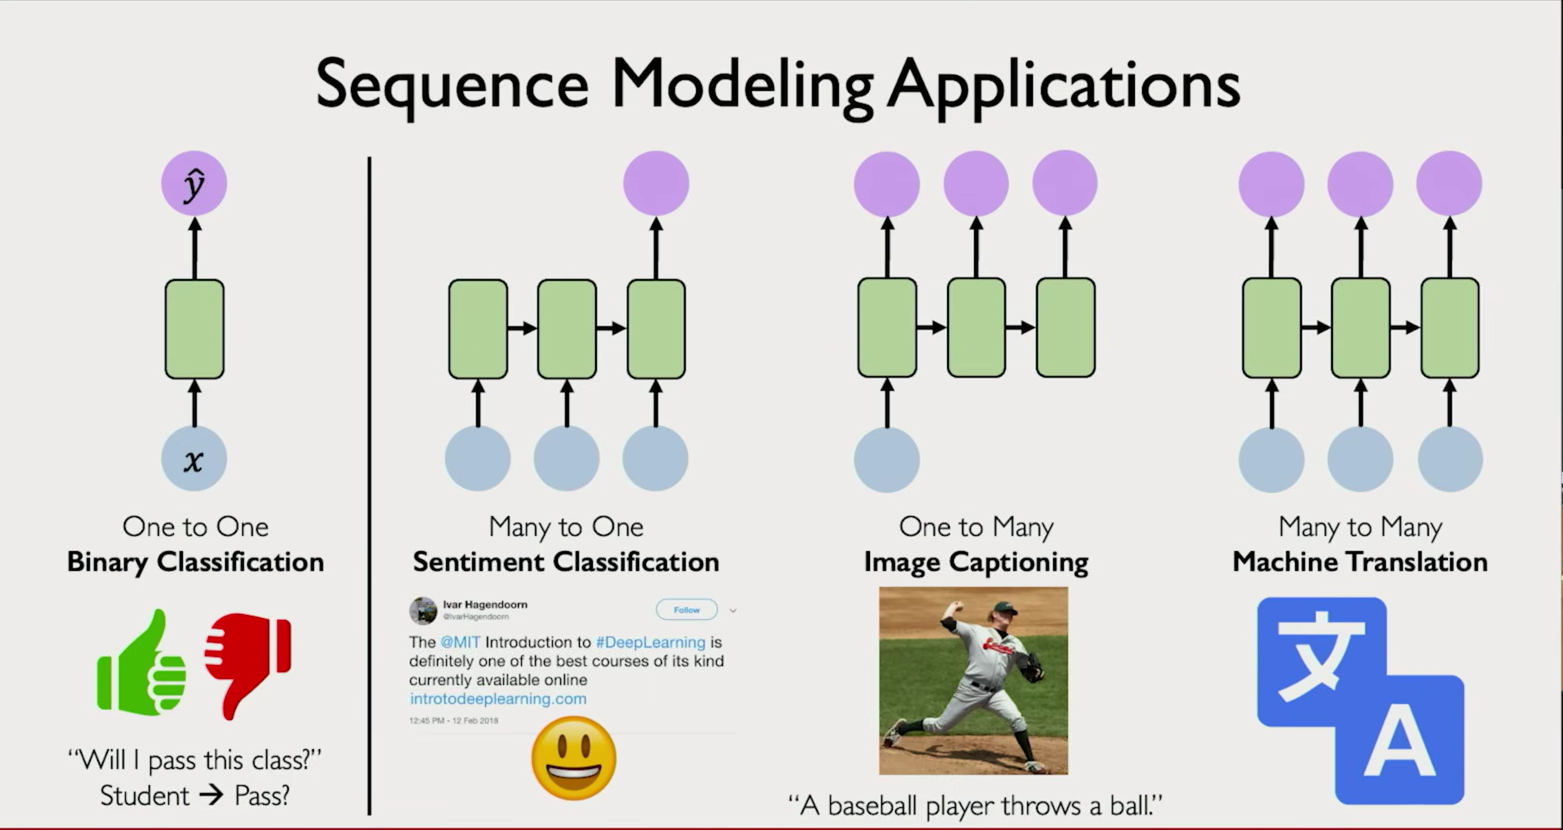

### 1.3. Hidden state ұғымын түсіндір. Ол не үшін қажет?
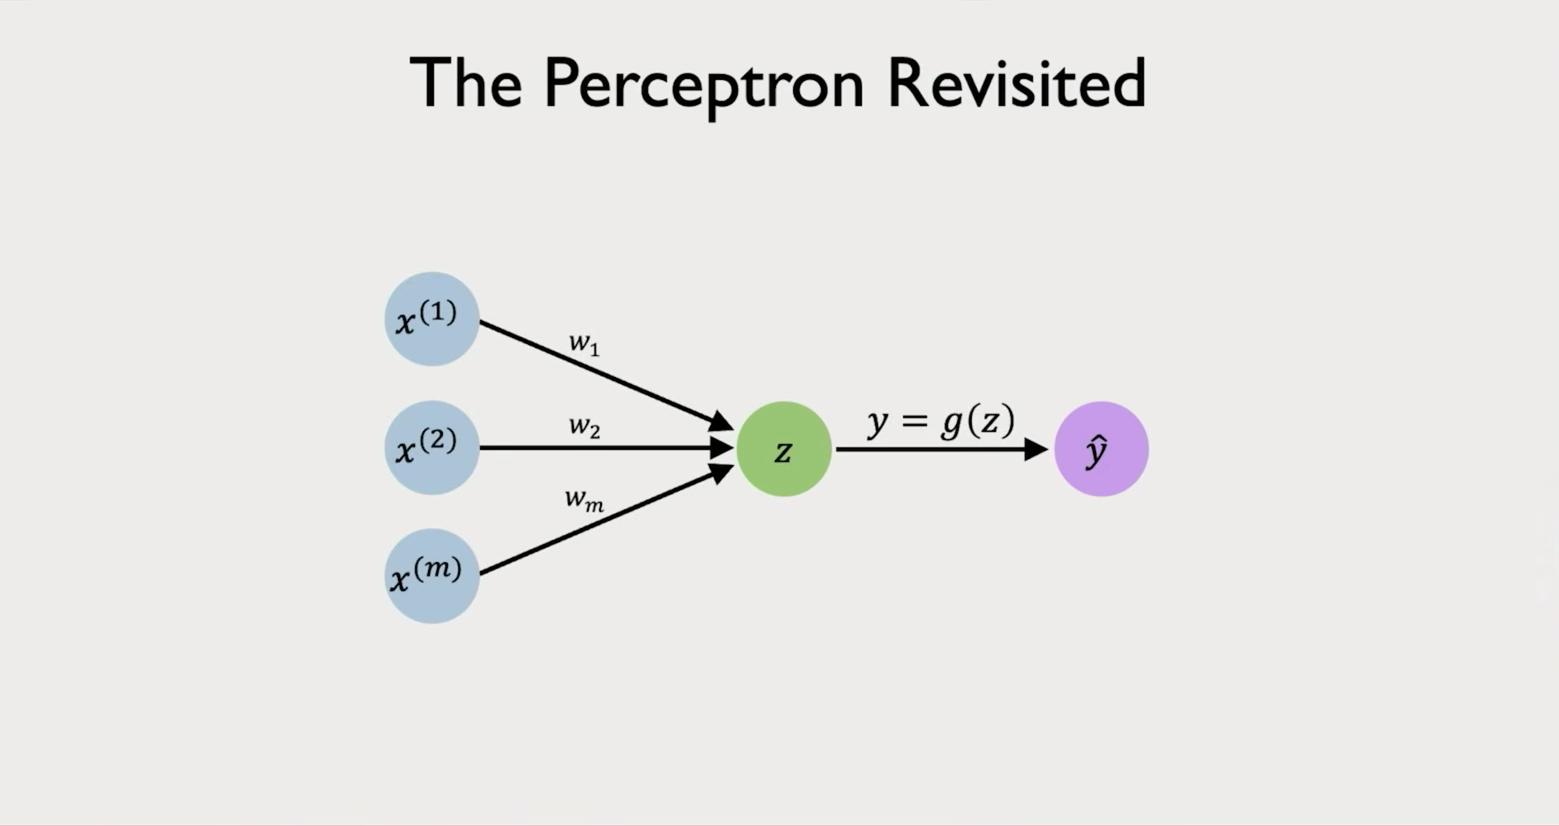

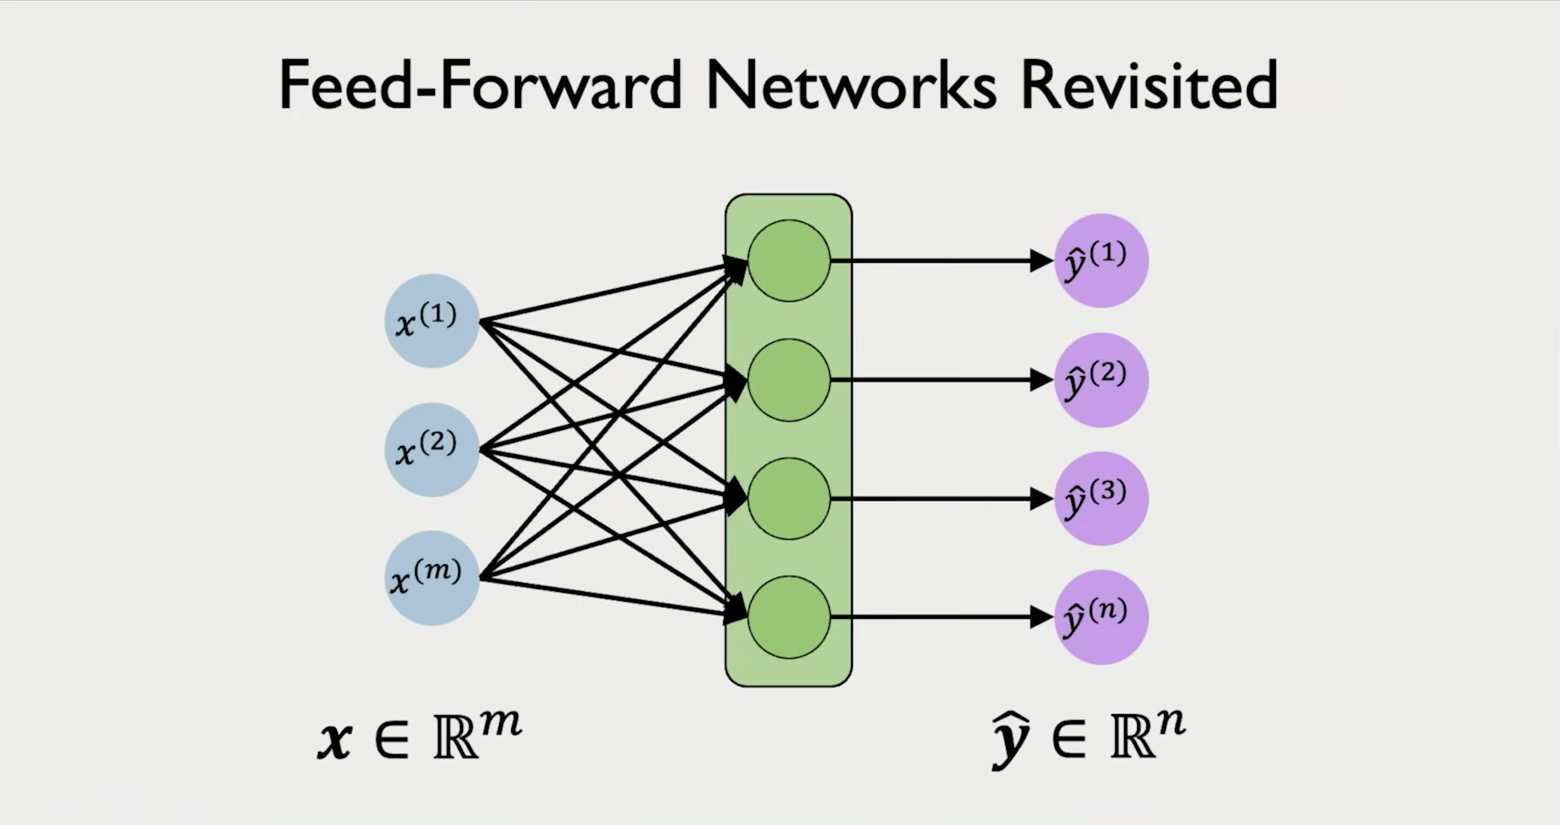

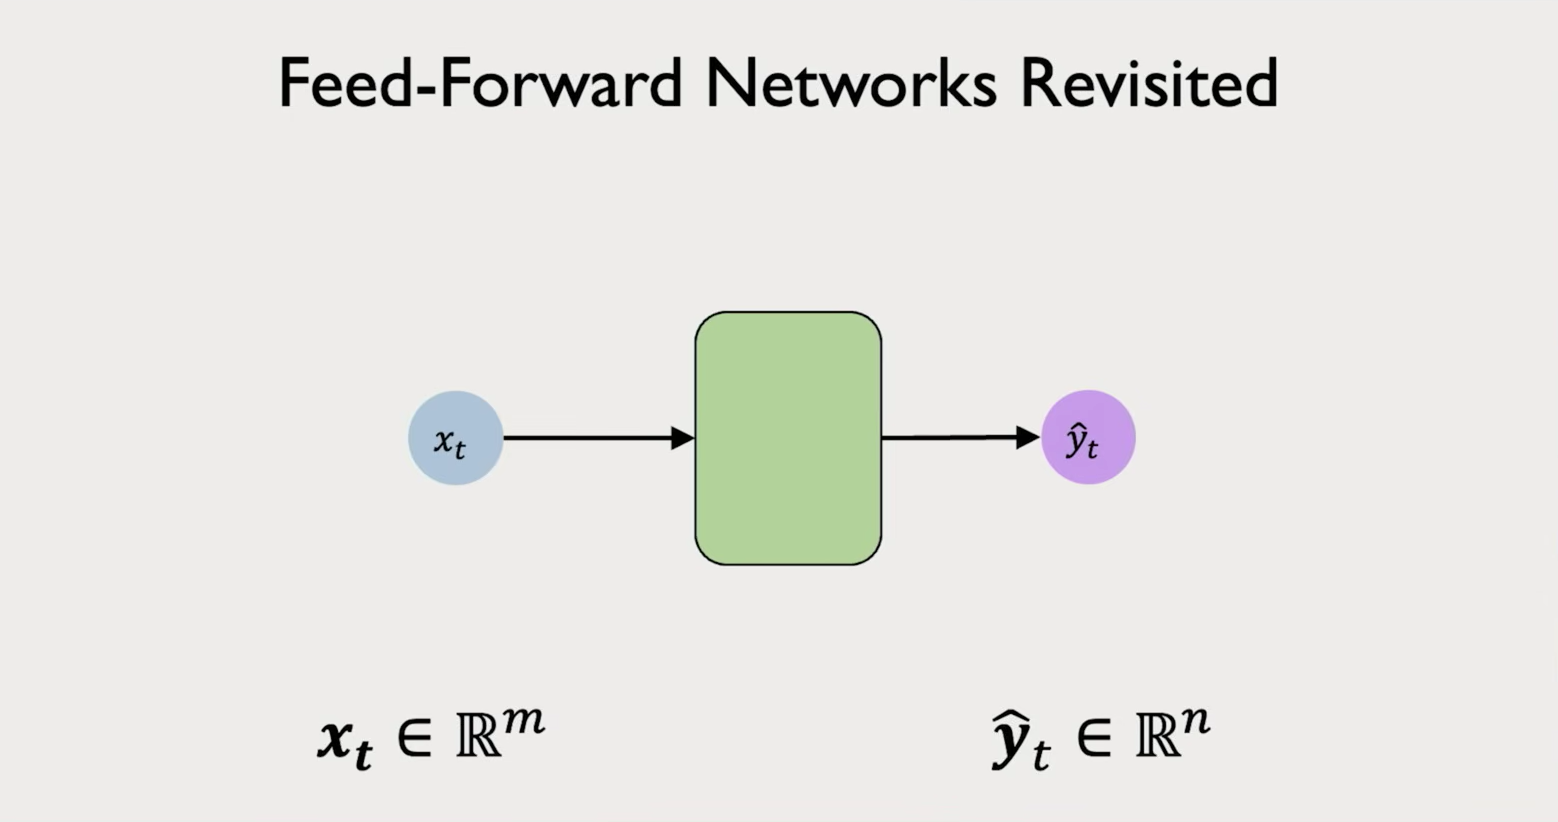

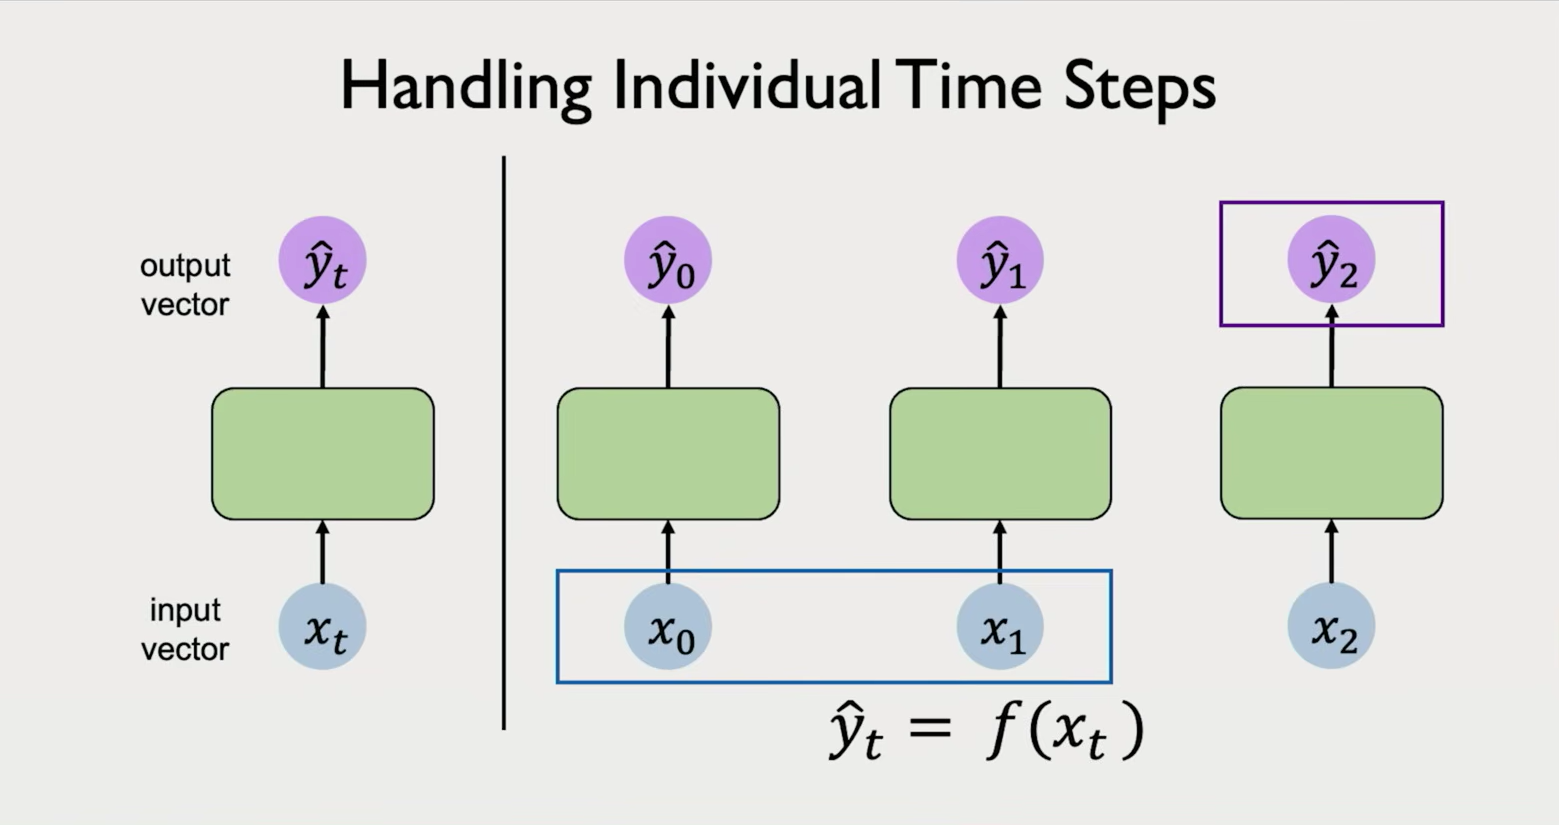

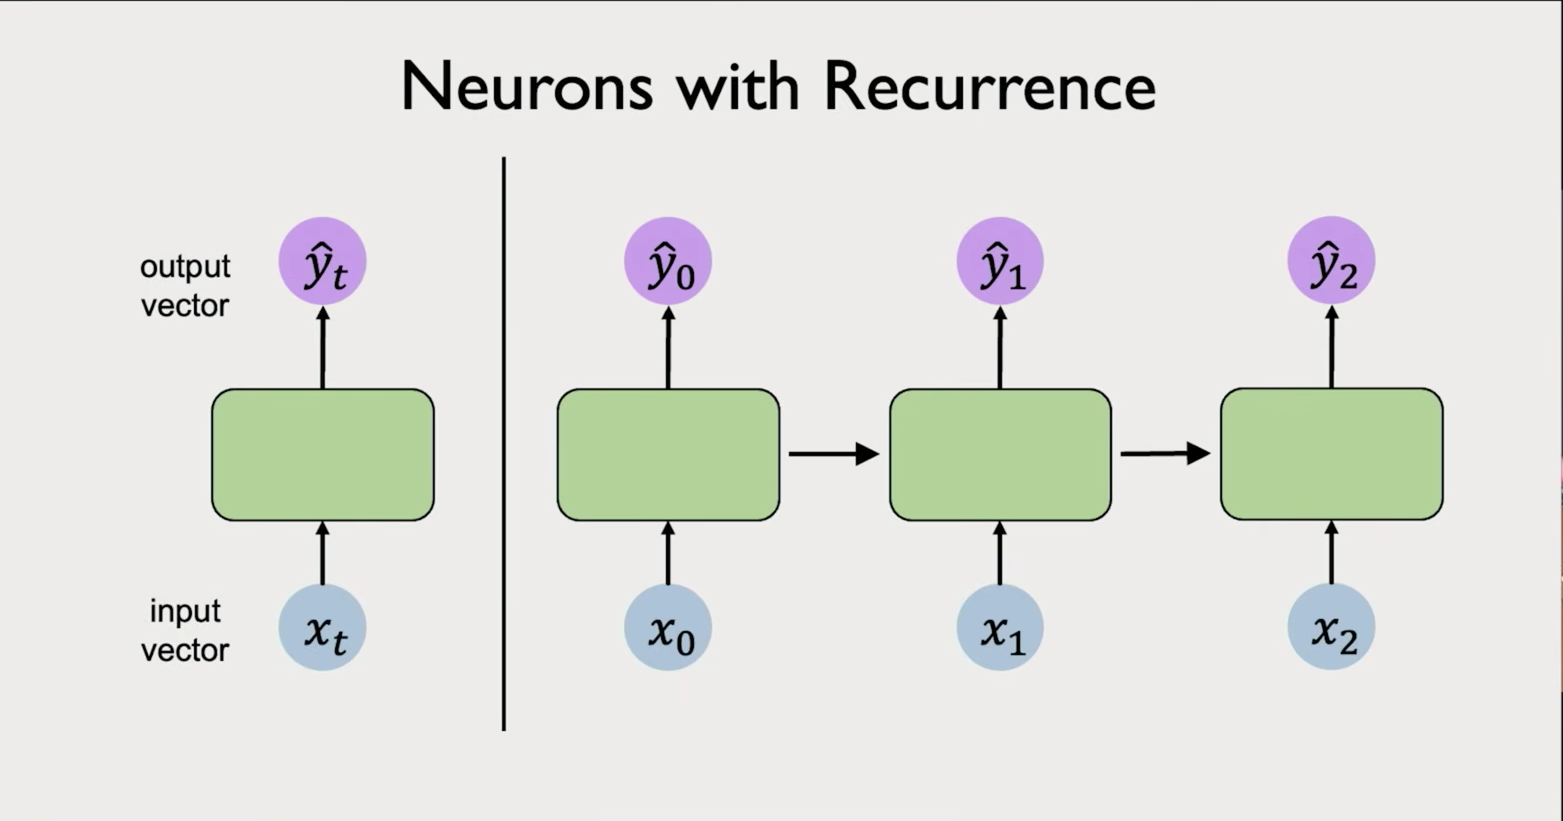

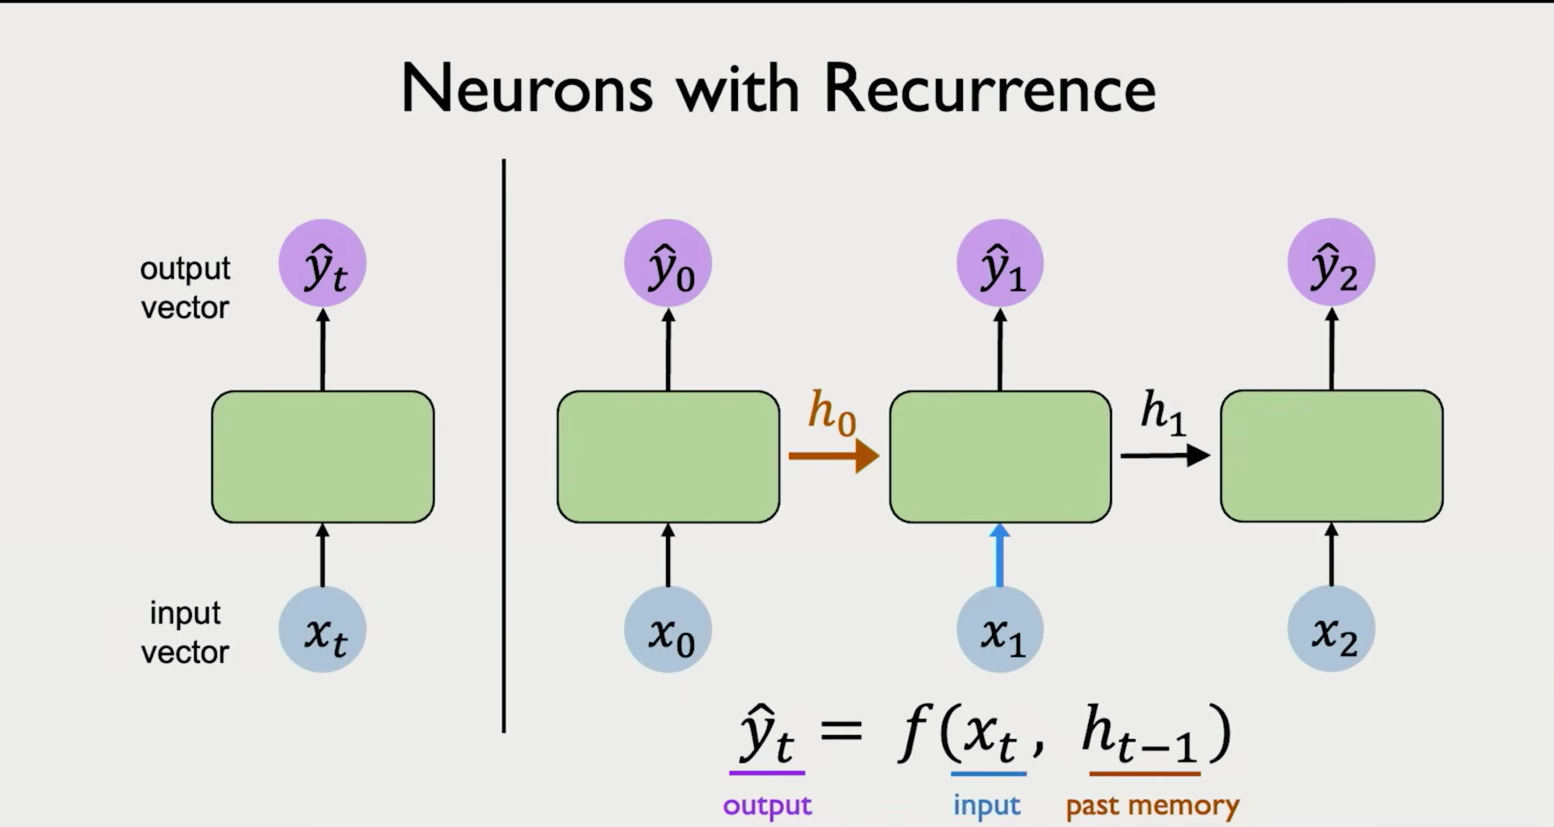

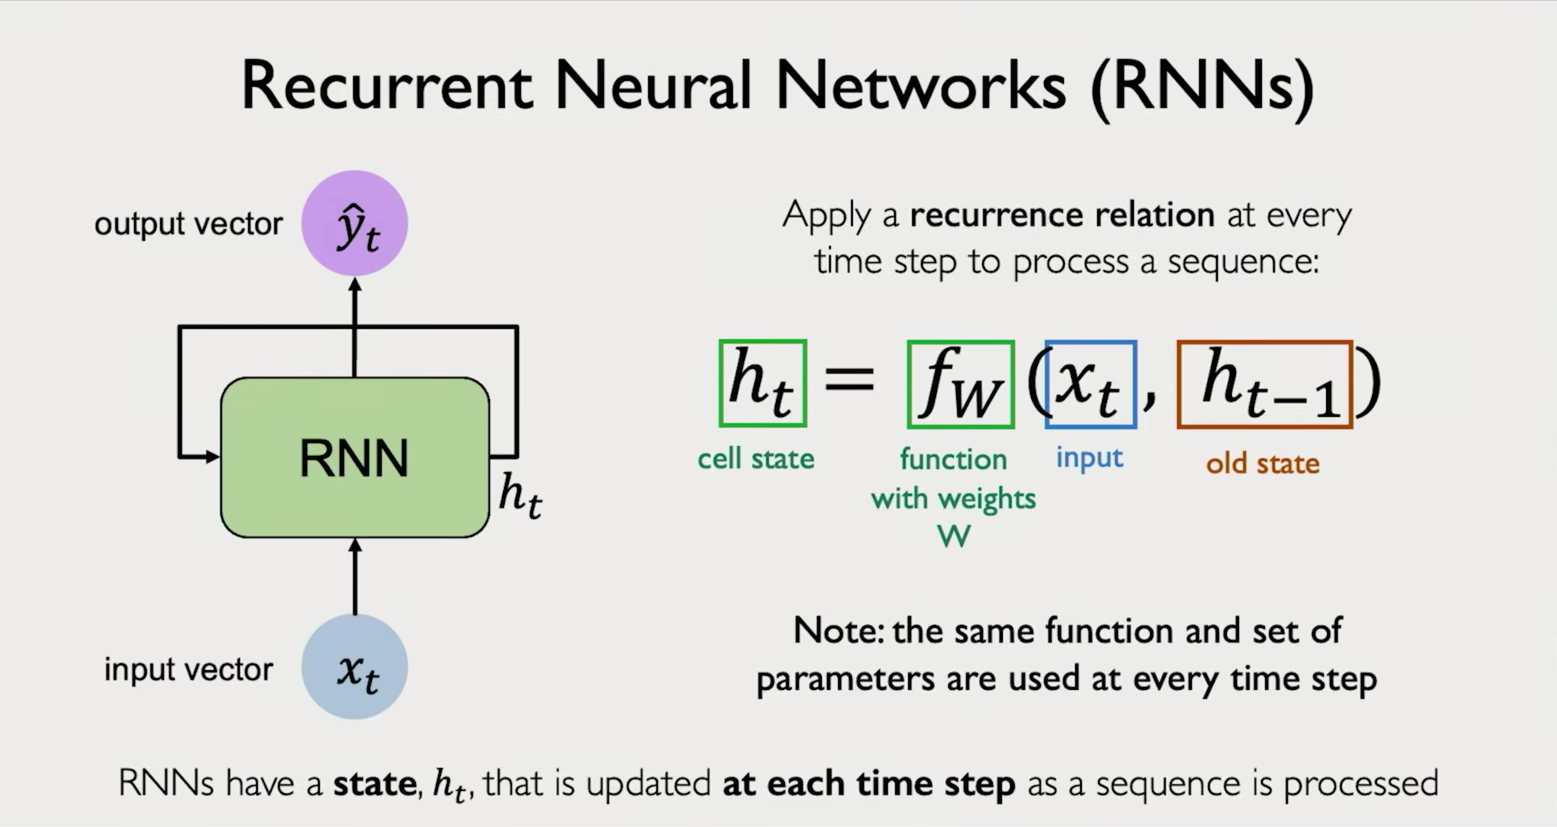

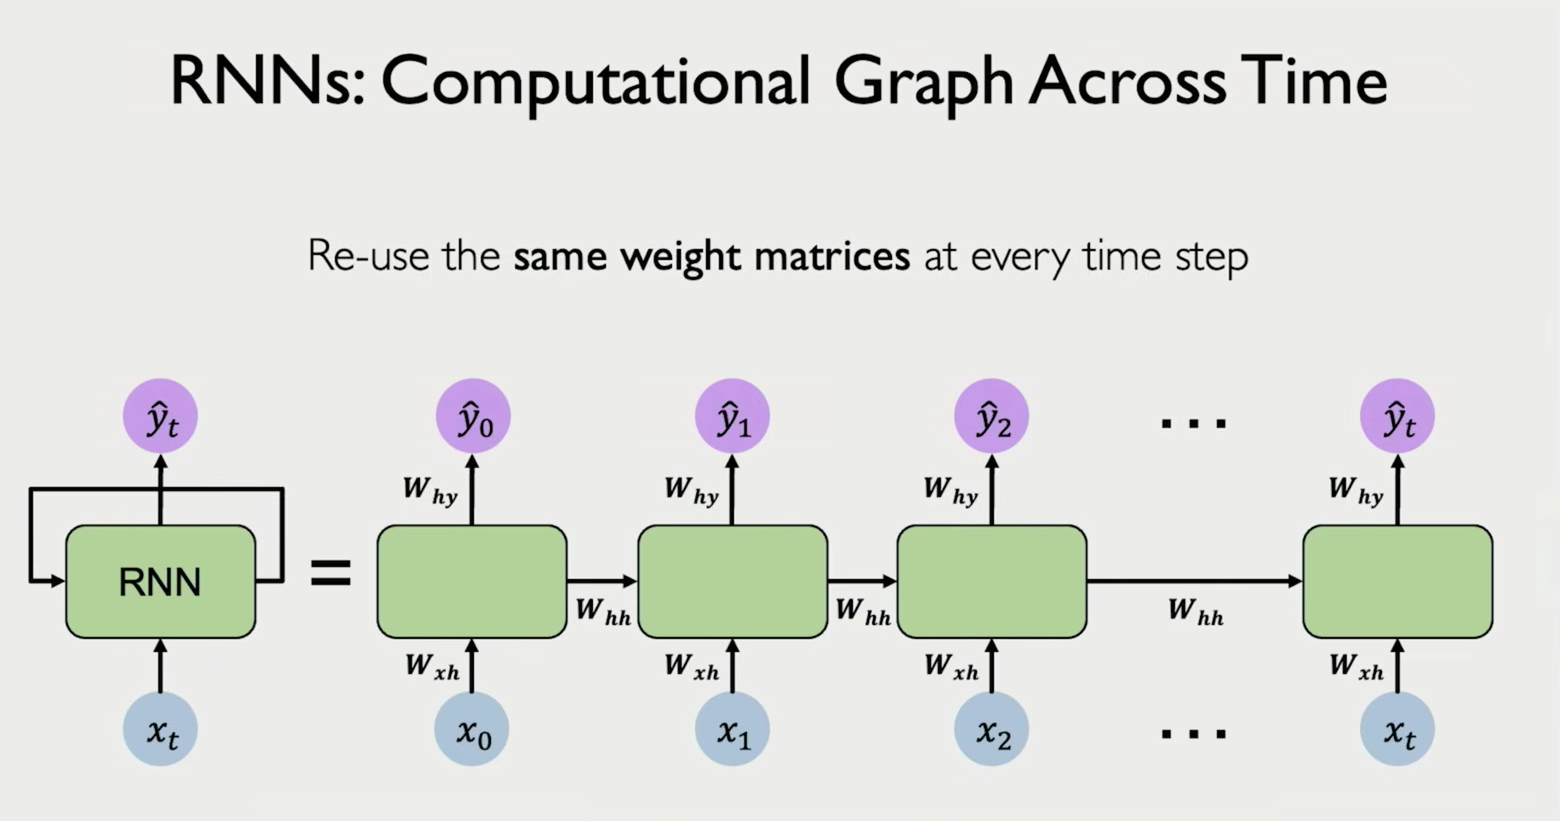

### 1.4. Vanishing gradient және exploding gradient мәселелері деген не?
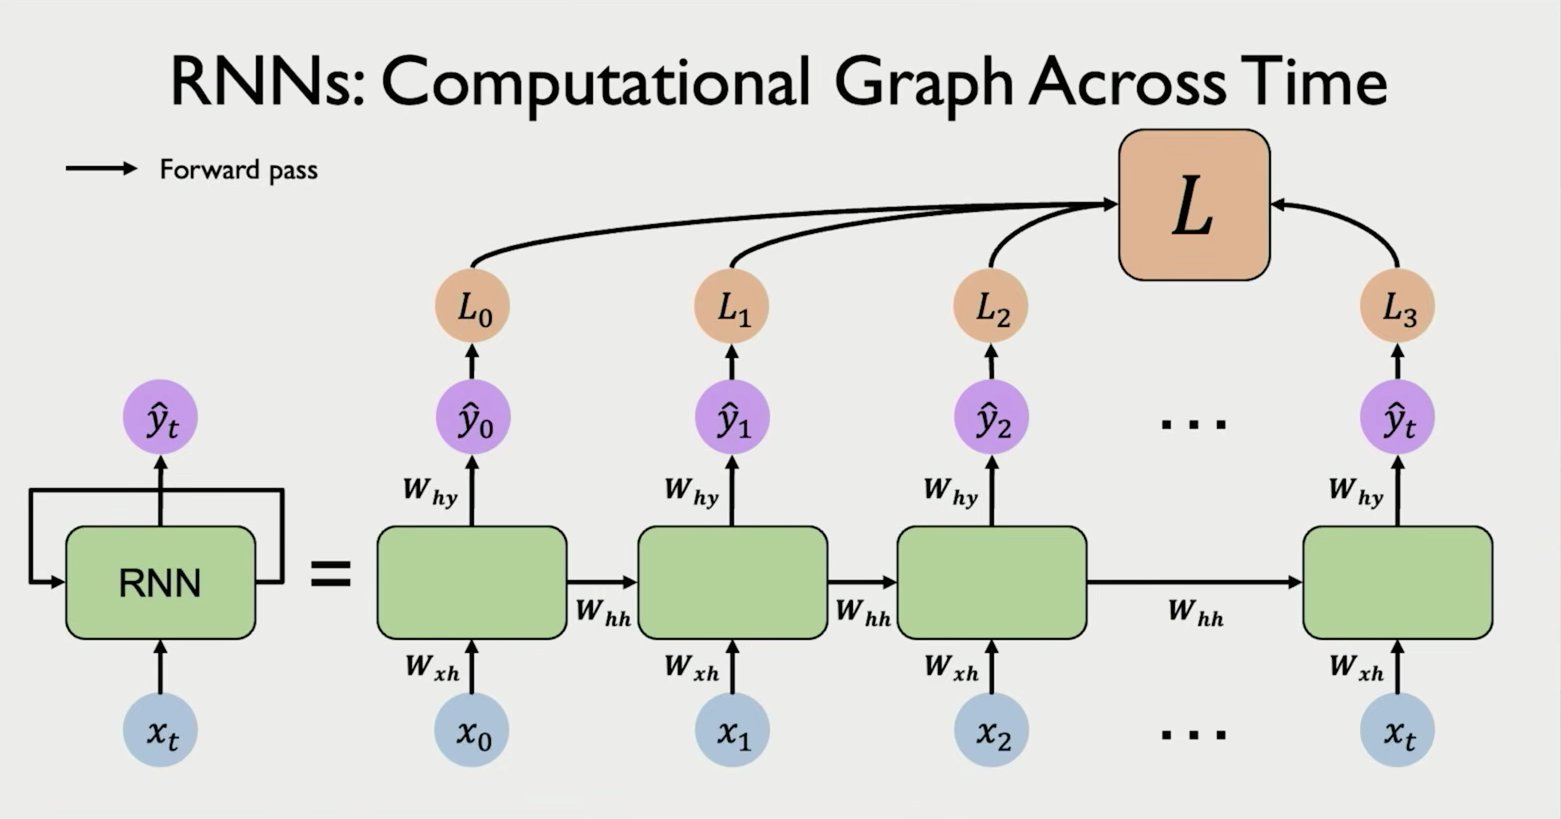

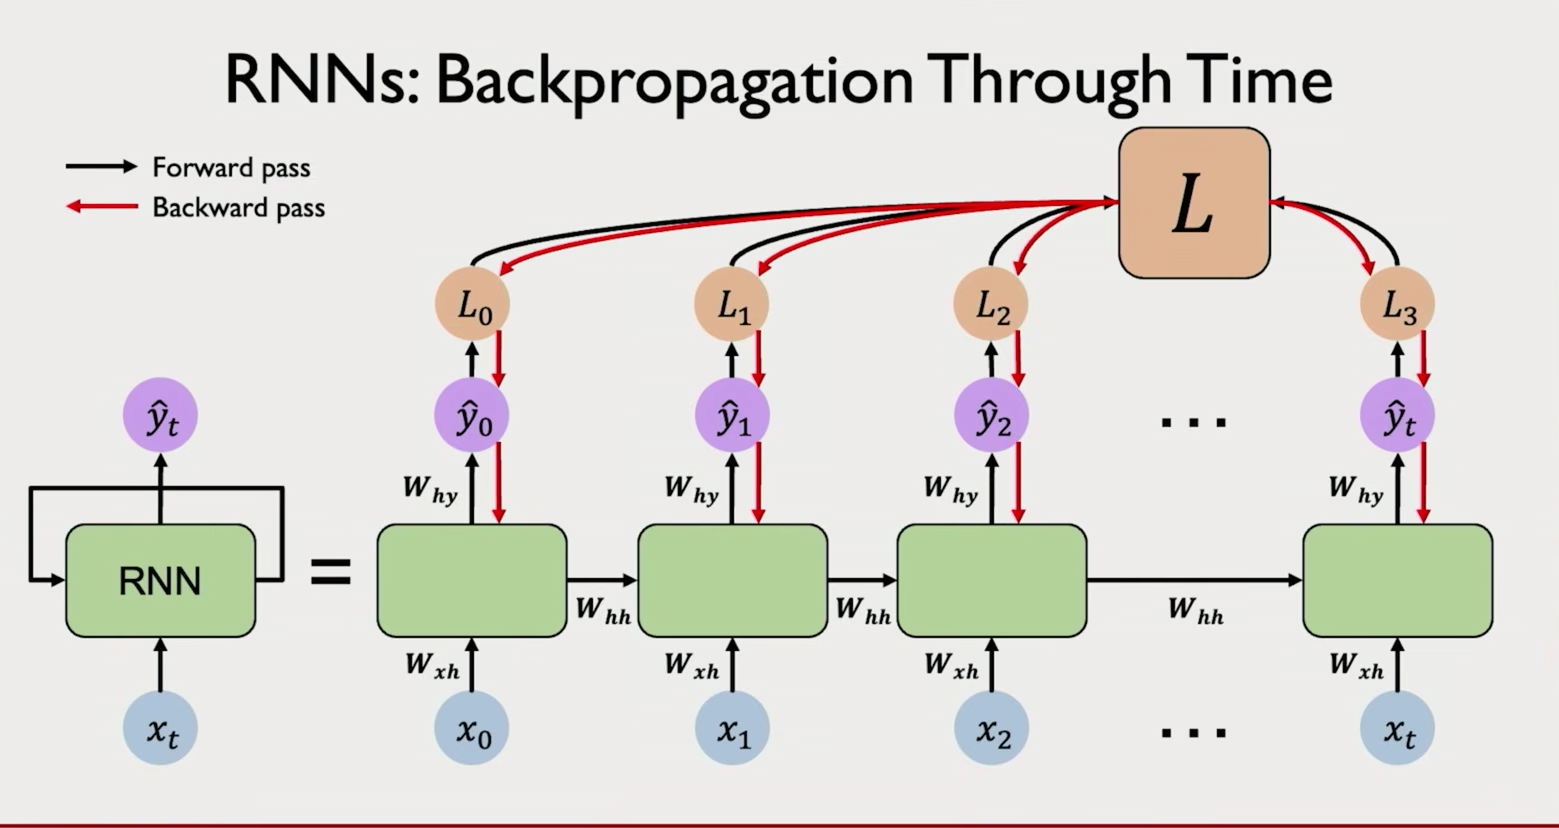

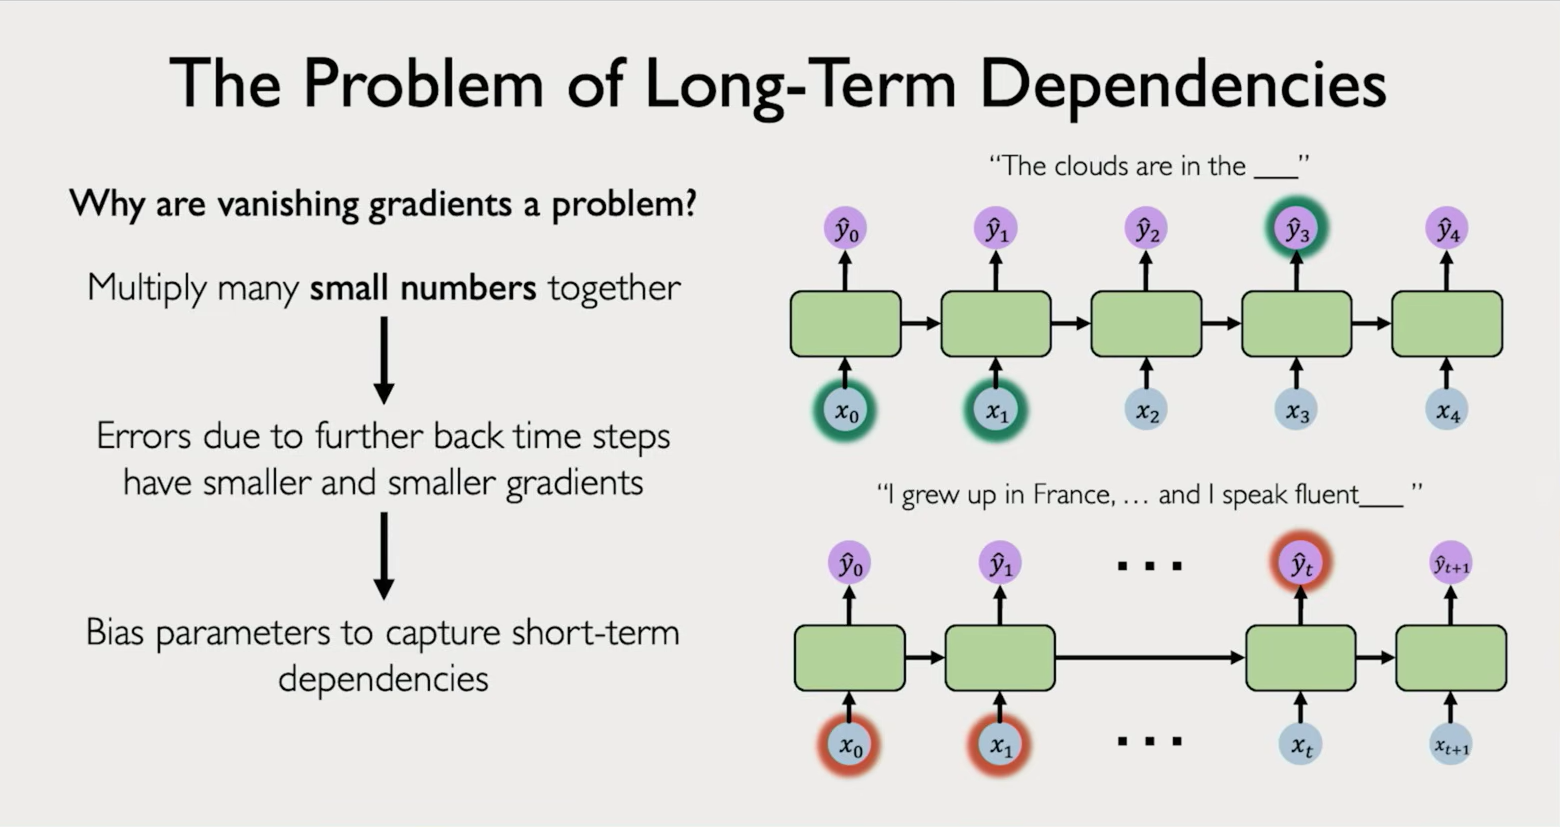

###  1.5. LSTM және GRU не үшін ұсынылды? Олардың RNN-нен негізгі айырмашылығы қандай?

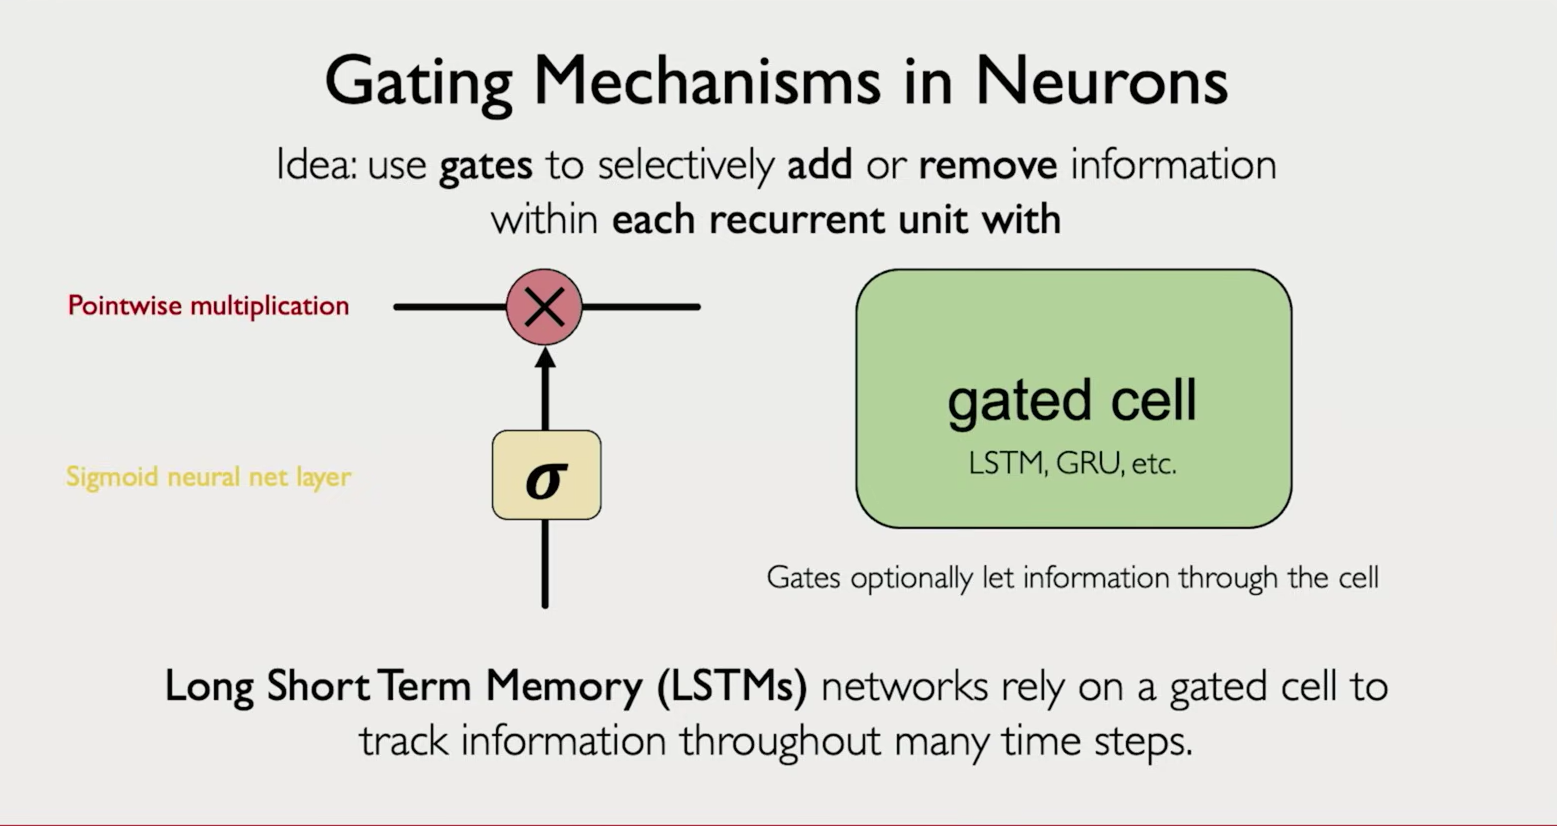

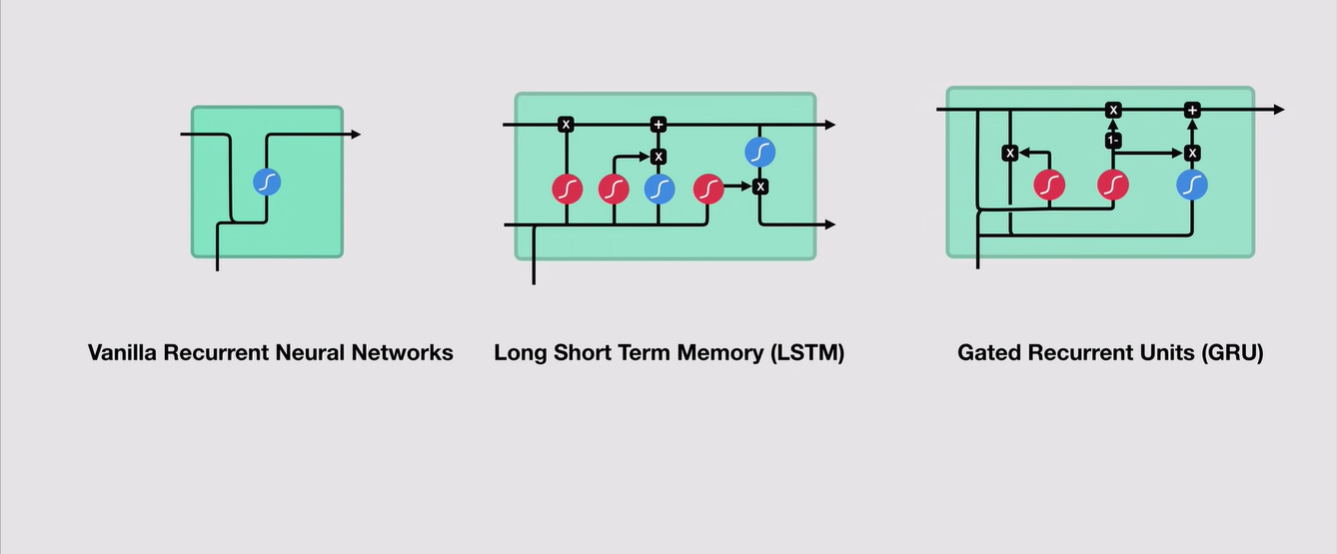

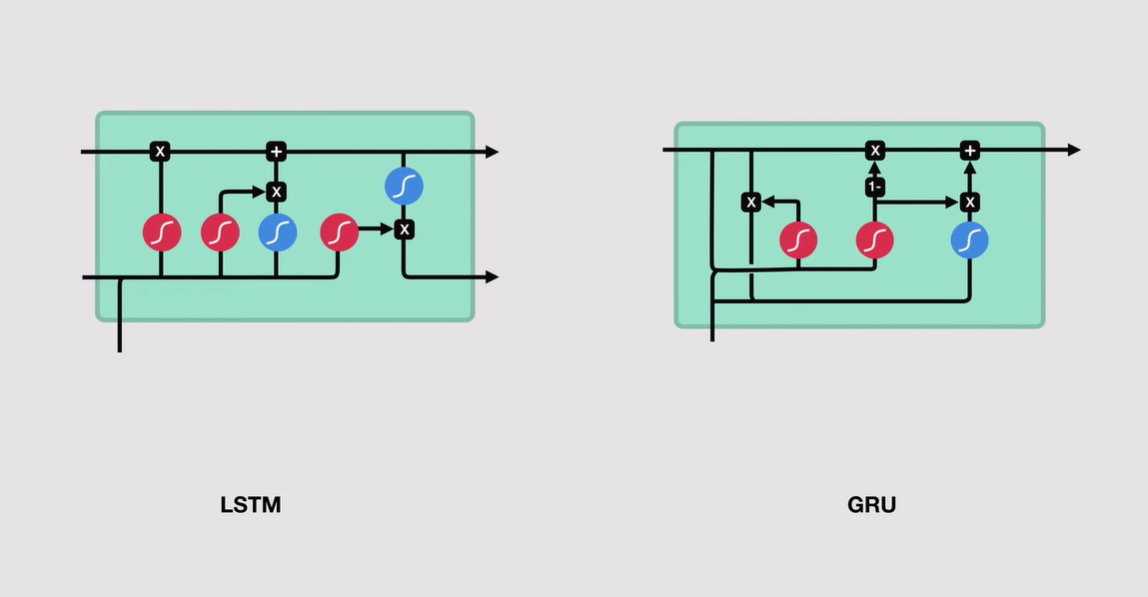

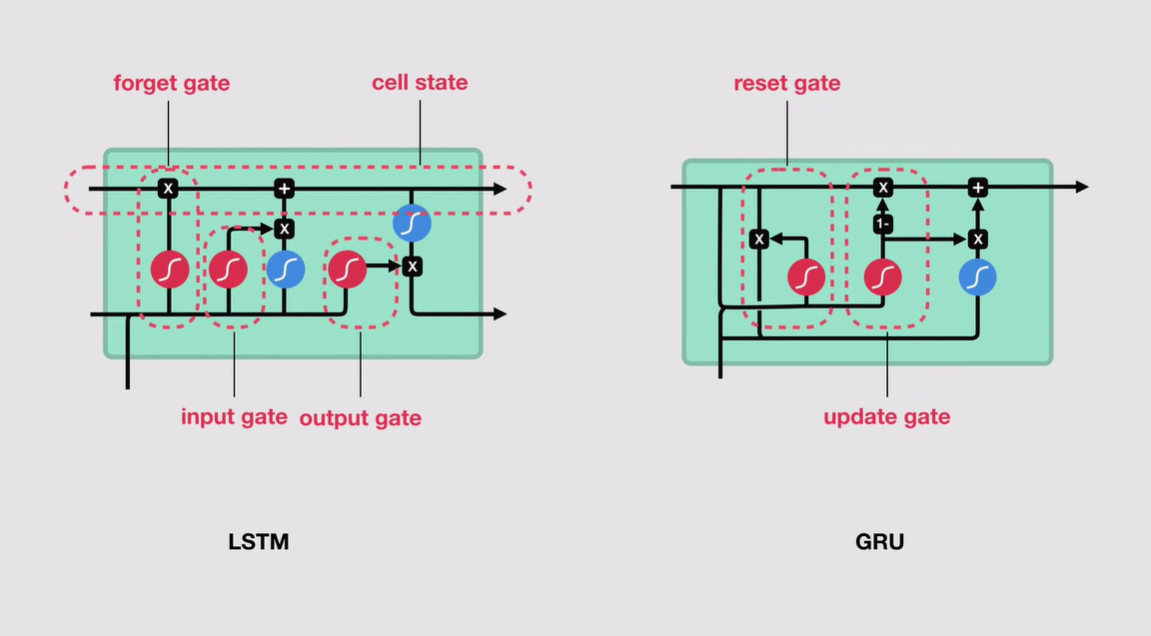

Как помогает функция Than сдерживать векторов в диапозоне [-1, 1]
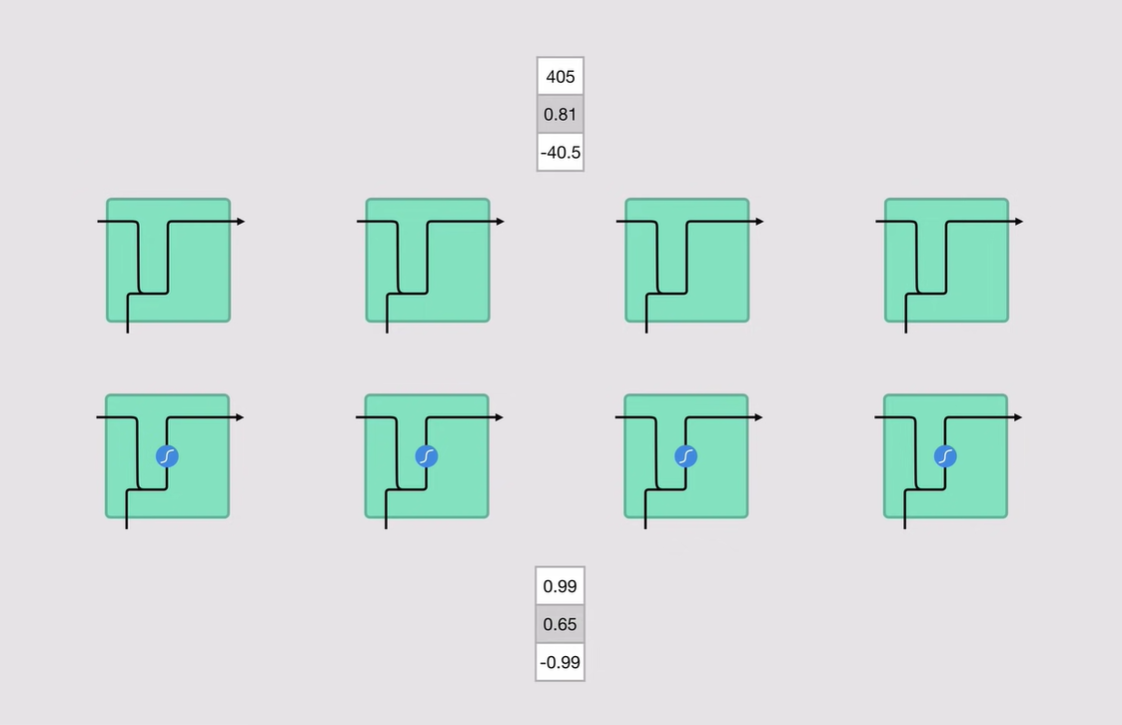

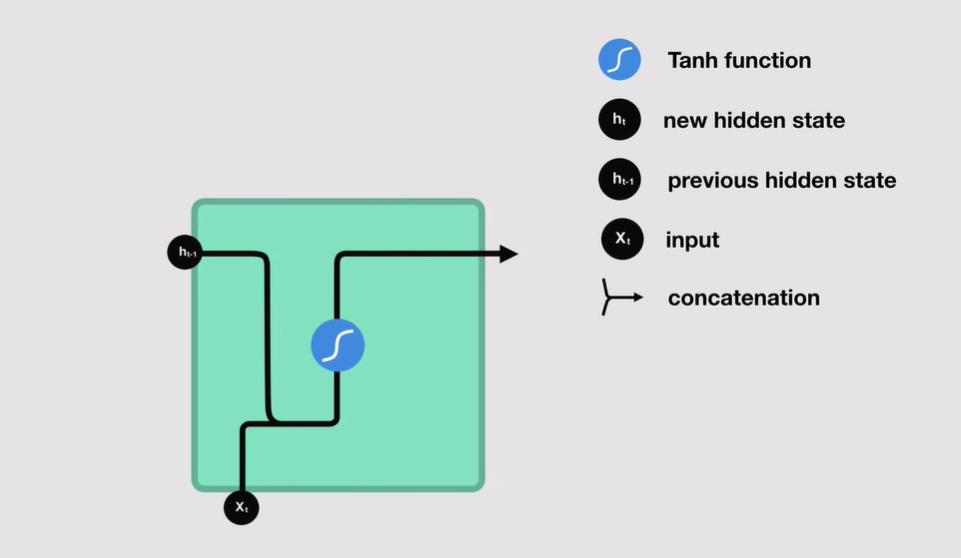

###  1.6. RNN-ді қай кезде қолдану тиімсіз болады?

## 2. Математикалык тапсырмалар

### 
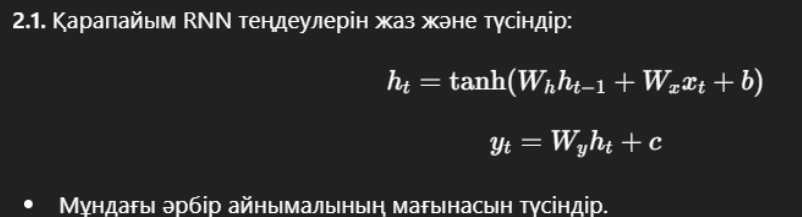

$x_t$: Ағымдағы уақыт қадамындағы Кіріс векторы $t$. Мысалы, ағымдағы сөзді ендіру.

$h_{t-1}$: Алдыңғы қадамдағы Жасырын күй (өткен жад). Онда өткеннің мәнмәтіні туралы ақпарат сақталады.

$h_t$: Жаңа жасырын күй (ағымдағы жад). Өткенді $(h h_{t-1} mixing)$ және бүгінді $(x_t.)$ араластырудың нәтижесі.

$\tanh$: Белсендіру функциясы (гиперболалық тангенс). Ол мәндерді **[-1, 1]** диапазонына қысады, осылайша есептеулер кезінде сандар "жарылып кетпейді".

$W_h, W_x, W_y$: Салмақ матрицалары. Бұл оқытылатын модельдің параметрлері. Маңызды: Барлық $W_h$ және $W_x$ барлық уақыт қадамдары үшін **бірдей**.

$b, c$: Біржақтылық **(bias)**. Қосымша оқытылатын параметрлер.

$y_t$: ағымдағы қадамдағы Шығыс **(output)** векторы. Модельді болжау (мысалы, келесі сөз немесе кілт класы).

###
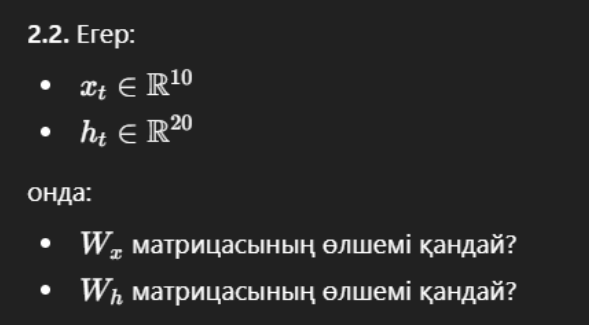

**Берілгені**

- $x_t \in \mathbb{R}^{10}$ — кіру деректер векторының өлшемі 10  
- $h_t \in \mathbb{R}^{20}$ — жасырын күй векторының өлшемі 20  



**Шешімі**

**$W_x$ матрицасының өлшемі**

**Қазақша түсіндірме:**  
$x_t$ (өлшемі 10) векторын көбейткенде нәтижесінде өлшемі 20 болатын вектор алу үшін матрица жол саны 20, баған саны 10 болуы керек.

**Жауабы:**  
$$
20 \times 10
$$



**$W_h$ матрицасының өлшемі**

**Қазақша түсіндірме:**  
$h_{t-1}$ (өлшемі 20) векторын көбейткенде нәтижесінде тағы да өлшемі 20 болатын вектор алу үшін матрица квадратты болуы керек.

**Жауабы:**  
$$
20 \times 20
$$

### 2.3. Неліктен ұзын тізбектерде градиент нөлге жақындайды?
Түсіндірмеде туынды, tanh / sigmoid функцияларын қолдан.



Ұзын тізбектерде градиенттің жоғалуының негізгі себебі — тізбекті туынды ережесі **(Chain Rule)**.

1. Көп мәрте көбейту: Backpropagation кезінде градиент әр уақыт қадамында салмақтарға ($W_h$) және активация функциясының туындысына көбейтіледі.

2. Активация функциялары: $\tanh$ немесе Sigmoid функцияларының туындылары әрқашан 1-ден кіші болады (мысалы, сигмоиданың макс туындысы 0.25).

3. Нәтиже: Егер біз 1-ден кіші сандарды (мысалы, 0.5 немесе 0.25) өзіне-өзі 50-100 рет көбейтсек, нәтиже экспоненциалды түрде азайып, нөлге жетеді. Сондықтан алғашқы қабаттардың салмақтары жаңартылмайды және модель "ескі" ақпаратты ұмытып қалады.

### 2.4. (Қиынырақ)
Backpropagation Through Time (BPTT) деген не?
Неге RNN оқытуы feedforward желіге қарағанда қиынырақ?


**BPTT** дегеніміз — градиенттің уақыт бойымен кері ағуы.Неге қиынырақ?

1. Тәуелділік: RNN-де әр қадам алдыңғы қадамға байланысты. Сондықтан есептеулерді параллель жүргізу қиын (Transformers сияқты емес).
2. Жады: Барлық аралық $h_t$ мәндерін жадыда сақтау керек, бұл көп ресурс талап етеді.
3. Тұрақсыздық: Градиент не жоғалып кетеді (Vanishing), не шексіз өсіп кетеді (Exploding).

## 3️⃣ Практикалық тапсырмалар (ойлануға)


### 3.1.
 Берілген уақыттық қатар:
 
 [2, 4, 6, 8, 10]
 
 RNN көмегімен келесі мәнді болжау идеясының логикасын түсіндір.


In [ ]:
import numpy as np 

x_requent = [2, 4, 6, 8, 10]

w_x = 0.5
w_h = 0.7
w_y = 1.2   # Output weight
h = 0       # Began memory

# Forward Pass
i = 0
for i, x in enumerate(x_requent):

    # h_t = (x_t * w_x) + (h_{t-1} * w_h)
    h = (x * w_x) + (h * w_h)
    print(f"\nStep {i}: \n Input: {x}, Hidden state: {h:.2f}")
    
    i += 1

prediction = h * w_y
print(f"\n\nPrediction for next value: {prediction:.2f}")



Step 0: 
 Input: 2, Hidden state: 1.00

Step 1: 
 Input: 4, Hidden state: 2.70

Step 2: 
 Input: 6, Hidden state: 4.89

Step 3: 
 Input: 8, Hidden state: 7.42

Step 4: 
 Input: 10, Hidden state: 10.20


Prediction for next value: 12.24


### 3.2.

 Мәтіндік деректер үшін RNN қолданғанда:

input қалай беріледі?

one-hot encoding не үшін керек?


In [ ]:
text = "hello"
chars = sorted(list(set(text)))     # ['e', 'h', 'l', 'o']
char_to_idx = {ch: i for i, ch in enumerate(chars)}
vocab_size = len(chars)

print(f"Dictionary: {char_to_idx}")


# One-Hot Encoding 
def one_hot(char):
    v = np.zeros((vocab_size, 1))
    v[char_to_idx[char]] = 1
    return v

# RNN __init__
hidden_size = 3
W_x = np.random.randn(hidden_size, vocab_size) * 0.1
W_h = np.random.randn(hidden_size, hidden_size) * 0.1
h = np.zeros((hidden_size, 1))


# Input RNN
print("\n\tSpelling the word 'hello'")
for char in text:
    x_t = one_hot(char)
    
    # h = tanh(W_x * x + W_h * h)
    h = np.tanh(np.dot(W_x, x_t) + np.dot(W_h, h))
    
    print(f"\nWord: '{char}' -> Input vector:\n{x_t.flatten()} -> Memory h: {h.flatten().round(2)}")

Dictionary: {'e': 0, 'h': 1, 'l': 2, 'o': 3}

	Spelling the word 'hello'

Word: 'h' -> Input vector:
[0. 1. 0. 0.] -> Memory h: [0.05 0.09 0.09]

Word: 'e' -> Input vector:
[1. 0. 0. 0.] -> Memory h: [-0.16  0.04 -0.1 ]

Word: 'l' -> Input vector:
[0. 0. 1. 0.] -> Memory h: [0.01 0.01 0.04]

Word: 'l' -> Input vector:
[0. 0. 1. 0.] -> Memory h: [0.02 0.02 0.06]

Word: 'o' -> Input vector:
[0. 0. 0. 1.] -> Memory h: [ 0.17 -0.   -0.11]


### 3.3.
 
 LSTM қолдану қажет болатын нақты 3 жағдай ойлап тап және түсіндір.


Python тілінде keras кітапханасын қолданып, бір қабатты RNN моделін құр.



In [18]:
import numpy as np
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import SimpleRNN, Dense
import warnings 
warnings.filterwarnings('ignore')

model = Sequential()

model.add(SimpleRNN(units = 32, input_shape = (5, 1), activation='tanh'))
model.add(Dense(units=1))

model.compile(optimizer = 'adam', loss='mse')
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_5 (SimpleRNN)        │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
X_train = np.array([[[2], [4], [6], [8], [10]]]) 
Y_train = np.array([[12]])

model.fit(X_train, Y_train, epochs=100, batch_size=16, verbose=0)

# Predics
test_input = np.array([[[4], [6], [8], [10], [12]]])

prediction = model.predict(test_input)
print(f"\nPredicted next value: {prediction[0][0]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

Predicted next value: 11.5396


### Қосымша (жобаға арналған идеялар)

📈 Ауа температурасының уақыттық қатарын болжау


📝 Қазақ тіліндегі мәтінге символдық RNN


💬 Чат-хабарламалардың келесі сөзін болжау


💰 Валюта бағамын болжау (toy example)
